# Introduction
<hr>
Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson.

# Import Statements
<hr>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/shane-221/100_days_of_python/refs/heads/main/74_Day_74_%20Aggregate_And_Merge_Data/data/colors.csv"
dataset1= pd.read_csv(url, names =["ID", "Name", "RGB", "is_trans"], header=0)

# Summary Statistics
dataset1.columns
dataset1.head()
dataset1.shape


(135, 4)

# Data Exploration
<hr>

<h2><div>Challenge 1<div></h2?: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [2]:
# Finds the unique set of names within the colour Column
dataset1["Name"].nunique(dropna=True)

135



<h2><div>Challenge 2<div></h2> Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [3]:
# Find ing the number of transparent colours from dataset. One way to do this:
dataset1[dataset1["is_trans"]=="t"].count()
dataset1[dataset1["is_trans"]=="f"].count()

# Another way to do this:
dataset1.groupby("is_trans")[["ID"]].count()

,ID
is_trans,
f,107
t,28




<h2><div>Challenge 3<div></h2> Change this into an h3 section heading: Understanding LEGO Themes vs. LEGO Sets



<h1><b>Understanding LEGO Themes vs LEGO Sets</b></h1>
<h3>Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.</h3>
<img src= "https://i.imgur.com/aKcwkSx.png">

<h3>A lego <b>set</b> is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.</h3>

<img src="https://i.imgur.com/whB1olq.png">




<h2><div>Challenge<div></h2> Read the sets.csv data and take a look at the first and last couple of rows.

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [4]:
url2= "https://raw.githubusercontent.com/shane-221/100_days_of_python/refs/heads/main/74_Day_74_%20Aggregate_And_Merge_Data/data/sets.csv"

# Getting the data
dataset2 =pd.read_csv(url2)
# the first few values
dataset2.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [5]:
# the last few values
dataset2.tail()

,set_num,name,year,theme_id,num_parts
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52
15709,YODACHRON-1,Yoda Chronicles Promotional Set,2013,158,413


<h2><div>Challenge<div></h2>
In which year were the first LEGO sets released and what were these sets called?


In [6]:
# Type is a number so no need to convert into datetime module
print(type(dataset2["year"][1]))



<class 'numpy.int64'>


In [7]:
#Geeting the earliest date to point to the first set of lego being released.
earliest_date =dataset2["year"].min()
row_value_earliest = dataset2[dataset2["year"]==earliest_date]
name_of_earliest_set= row_value_earliest["name"]
print(name_of_earliest_set)


# Or you could use the sort function where it automatically sorts by ascending order
dataset2.sort_values("year").head()

9521           Extra-Large Gift Set (ABB)
9534                 Large Gift Set (ABB)
9539                Medium Gift Set (ABB)
9544                Small Brick Set (ABB)
9545    Small Doors and Windows Set (ABB)
Name: name, dtype: object


,set_num,name,year,theme_id,num_parts
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9534,700.2-1,Large Gift Set (ABB),1949,365,178


<h2><div>Challenge<div></h2>
How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [8]:
# How many differnt sets of LEGO did they sell in the first year?
dataset2[dataset2["year"]==earliest_date].nunique()[["set_num"]]

,0
set_num,5


<h2><div>Challenge<div></h2>
Find the top 5 LEGO sets with the most number of parts.

In [9]:
# Number of Lego sets with the most number of parts
dataset2.sort_values("num_parts", ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


<h2><div>Challenge<div></h2>
Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019?

In [10]:
# Group by the sets released per year
dataset3 = dataset2.groupby("year").nunique()
print(dataset3)
dataset4= dataset3.reset_index()
print(dataset4)

# Could use a pivot table if there are two categorical values to match corrrectly.

      set_num  name  theme_id  num_parts
year                                    
1949        5     5         2          4
1950        6     6         1          1
1953        4     4         2          4
1954       14    13         2          5
1955       28    27         4         22
...       ...   ...       ...        ...
2017      786   760        89        325
2018      816   799        93        339
2019      840   825        78        336
2020      674   664        82        320
2021        3     3         1          1

[71 rows x 4 columns]
    year  set_num  name  theme_id  num_parts
0   1949        5     5         2          4
1   1950        6     6         1          1
2   1953        4     4         2          4
3   1954       14    13         2          5
4   1955       28    27         4         22
..   ...      ...   ...       ...        ...
66  2017      786   760        89        325
67  2018      816   799        93        339
68  2019      840   825        78      

<h2><div>Challenge<div></h2>

Show the number of LEGO releases on a line chart using Matplotlib. <br>

<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames.

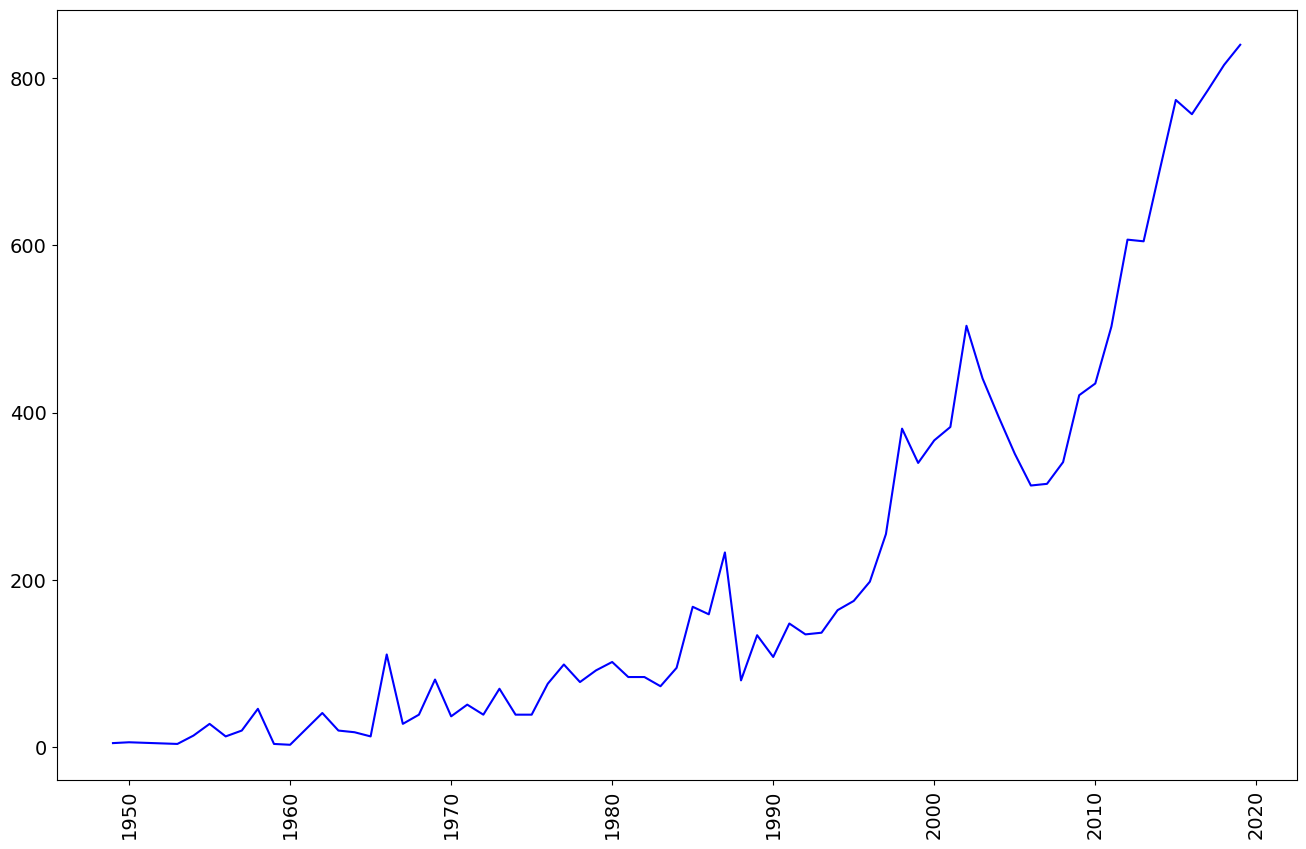

In [11]:
import matplotlib.pyplot as plt

# setting the shape of the graph
plt.figure(figsize= (16, 10))

# fontsize for x and y values:
plt.xticks(fontsize=14, rotation =90)
plt.yticks(fontsize= 14)

# Plotting the table plot( what goes in the x , what goes in the y , colour)
plt.plot(dataset3.index[:-2], dataset3.set_num[:-2], "b")

      # Remeber when you list slice it--- Needs to be from the index values and not the assigned groupings

# Add lablels

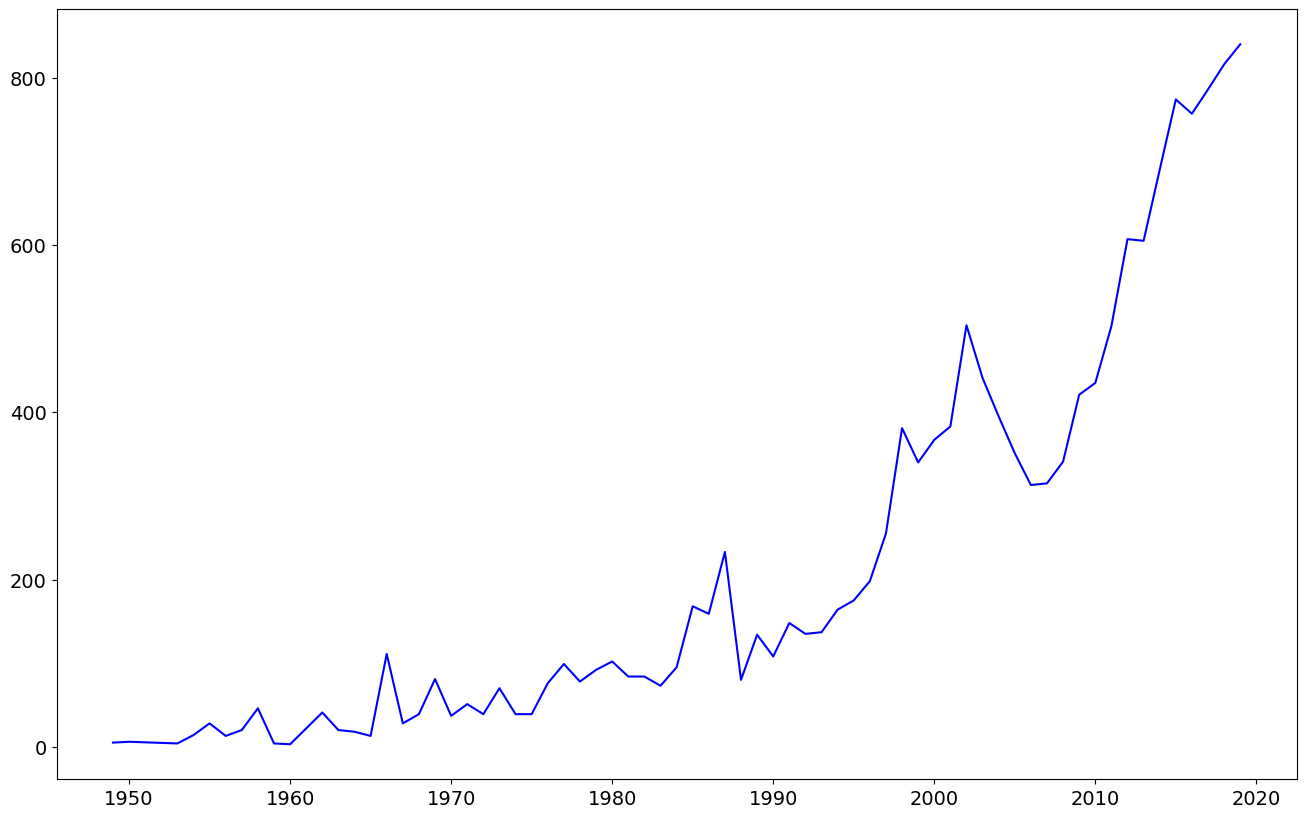

In [12]:
# Another way to do it:


import matplotlib.pyplot as plt

# setting the shape of the graph
plt.figure(figsize= (16, 10))

# fontsize for x and y values:
plt.xticks(fontsize=14)
plt.yticks(fontsize= 14)

# Plotting the table plot( what goes in the x , what goes in the y , colour)
plt.plot(dataset4["year"][:-2], dataset3["set_num"][:-2], "b")

      # Remeber when you list slice it--- Needs to be from the index values and not the assigned groupings


<h1> Data Analysis</h1>
<hr>



<h2><div> Challenge 1<div></h2>
Aggregate Data with the Python .agg() Function
Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [13]:
themes_dataset= dataset2.groupby("year").agg({"theme_id": pd.Series.nunique})
                                                      # PD is the module, series represents the vector, and n uqnieu is the function all cases within a dicutionaly so the format always stays the same.



      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        89
2018        93
2019        78
2020        82
2021         1

[71 rows x 1 columns]


In [15]:
# Change the name of the column
themes_dataset.rename (columns = {"theme_id":"nr_themes"}, inplace = True)
print(themes_dataset)

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
...         ...
2017         89
2018         93
2019         78
2020         82
2021          1

[71 rows x 1 columns]


<h2><dir>Challenge 2<dir></h2> Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021).

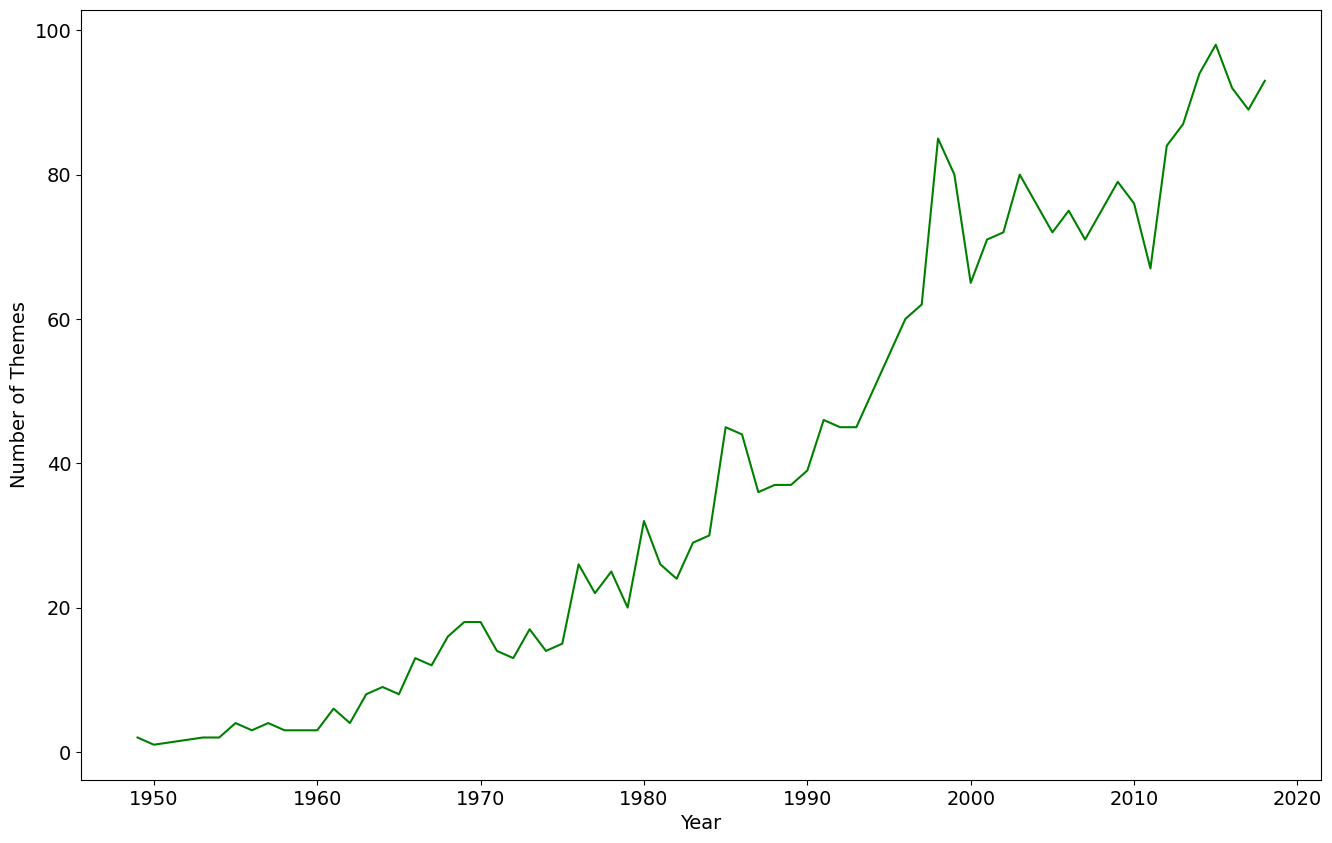

In [21]:
          # Size of the puicture
plt.figure(figsize=(16,10))

           # Size of the fonts
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

           # Labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Themes", fontsize=14)

          # The digaram itself: if you only have two things, no need to spcity which is the x and which is the Y
plt.plot(themes_dataset[:-3], "g")


### Line Charts with Two Seperate Axes

In [13]:
# Good to have towo axis with two diffent sets of inputs and scale.


  # one of the axis should represent the current axis
ax1 = plt.gca()
  # Set up another set of axis that shares the same x axis :
ax2 = ax1.twinx()

  # Plotting both of them:

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart?

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets?

**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

### Merging (i.e., Combining) DataFrames based on a Key
